<a href="https://colab.research.google.com/github/PraneetVR/IIITDMJ-DL-Summer-School-Program-Assignments/blob/main/Week_2_Day_6_IIITDMJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 2 Day 6 Assignment

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np

#Q1,Q2

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

trainset = torchvision.datasets.CIFAR10(root='/content/sample_data', train=True,transform=transform, download=True)
testset = torchvision.datasets.CIFAR10(root='/content/sample_data', train=False,transform=transform, download=True)

100%|██████████| 170M/170M [00:01<00:00, 86.8MB/s]


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(testloader)

images, labels = next(dataiter)

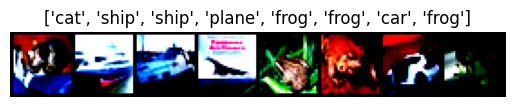

In [ ]:
def imshow(img, label_name):
  img = torchvision.utils.make_grid(img)
  npimg = img.numpy()

  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.title(label_name)
  plt.axis('off')

label_name = [classes[label] for label in labels]
imshow(images, label_name)

Channel last  =

input size = 32 x 32 x 3
n = 32

kernel size =3, number of kernels = 32, padding =1
f= 3 p =1, s= 1

output size = {(n -f +2 p ) / s }+1
|
output size = {(32-3+2)/1}+1 = 32 x 32 x 32

pool size = 2 x 2

output size = 16 x 16 x 32

#Q3

In [ ]:
#a,c
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

#Q4

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [ ]:
model = CNN().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm.auto import tqdm
def train(model, trainloader, optimizer, criterion):
  model.train()
  print("Training:")
  train_running_loss = 0.0
  train_running_correct = 0
  counter =0

  for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
    counter +=1
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images) # forward pass
    loss = criterion(outputs, labels) # calculate loss
    train_running_loss +=loss.item()
    # print(outputs.data)
    # print(torch.max(outputs.data, 1))
    _, preds = torch.max(outputs.data, 1) # calculate the accuracy
    train_running_correct += (preds == labels).sum().item()

    loss.backward() # backward propagation
    optimizer.step() # weight update process


  epoch_loss = train_running_loss / counter
  epoch_acc = 100. * (train_running_correct/ len(trainloader.dataset))
  return epoch_loss, epoch_acc

In [ ]:
import time

epochs = 10

train_loss, train_acc = [], []

for epoch in range(epochs):
  print(f"Epoch {epoch+1}/{epochs}, Time:{time.ctime()}")
  train_epoch_loss, train_epoch_acc = train(model, trainloader, optimizer, criterion)
  train_loss.append(train_epoch_loss)
  train_acc.append(train_epoch_acc)
  print(f"Training loss: {train_epoch_loss:.3f},training acc: {train_epoch_acc:.3f}")
  print('----'* 50)
  time.sleep(5)

Epoch 1/10, Time:Tue May 27 04:51:52 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 2.121,training acc: 33.062
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 2/10, Time:Tue May 27 04:54:04 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 2.033,training acc: 42.140
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 3/10, Time:Tue May 27 04:56:14 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.991,training acc: 46.544
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 4/10, Time:Tue May 27 04:58:30 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.960,training acc: 49.652
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 5/10, Time:Tue May 27 05:00:45 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.938,training acc: 52.044
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 6/10, Time:Tue May 27 05:02:59 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.922,training acc: 53.514
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 7/10, Time:Tue May 27 05:05:20 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.901,training acc: 55.660
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 8/10, Time:Tue May 27 05:07:42 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.890,training acc: 56.770
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 9/10, Time:Tue May 27 05:10:08 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.885,training acc: 57.414
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 10/10, Time:Tue May 27 05:12:41 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Training loss: 1.875,training acc: 58.352
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


If training accuracy rises much faster than validation accuracy, or if validation accuracy plateaus or drops while training accuracy keeps increasing, the model is overfitting.

If both training and validation accuracy improve and then stabilize, the model is converging well. If accuracy fluctuates or does not improve, learning rate or model complexity may need adjustment.



#Q5

In [ ]:
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=True)

In [ ]:
def test(model, testloader, criterion):
  model.eval()
  print("Testing:")
  test_running_loss = 0.0
  test_running_correct = 0
  counter =0
  with torch.no_grad():
    for i, data in tqdm(enumerate(testloader), total=len(testloader)):
      counter +=1
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images) # forward pass
      loss = criterion(outputs, labels) # calculate loss
      test_running_loss +=loss.item()
      _, preds = torch.max(outputs.data, 1) # calculate the accuracy
      test_running_correct += (preds == labels).sum().item()

    epoch_loss = test_running_loss / counter
    epoch_acc = 100. * (test_running_correct/ len(testloader.dataset))
    return epoch_loss, epoch_acc

In [ ]:
test_loss, test_acc = test(model, testloader, criterion)

Testing:


  0%|          | 0/1250 [00:00<?, ?it/s]

In [ ]:
print("Loss:", test_loss)

Loss: 1.8521566944122314


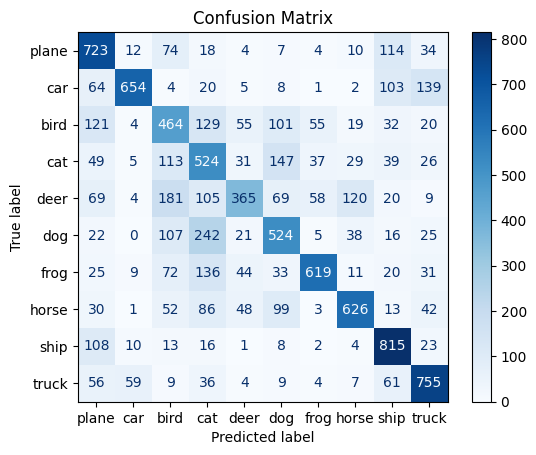

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Test Accuracy: {acc:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")


Test Accuracy: 0.6069
Precision (macro): 0.6265
Recall (macro): 0.6069
F1-score (macro): 0.6076
